---------
属于：Convolution Layers
-------

-----------------

学习：
1、Conv2d

class torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, 
dilation=1, groups=1, bias=True, padding_mode='zeros', device=None, dtype=None)


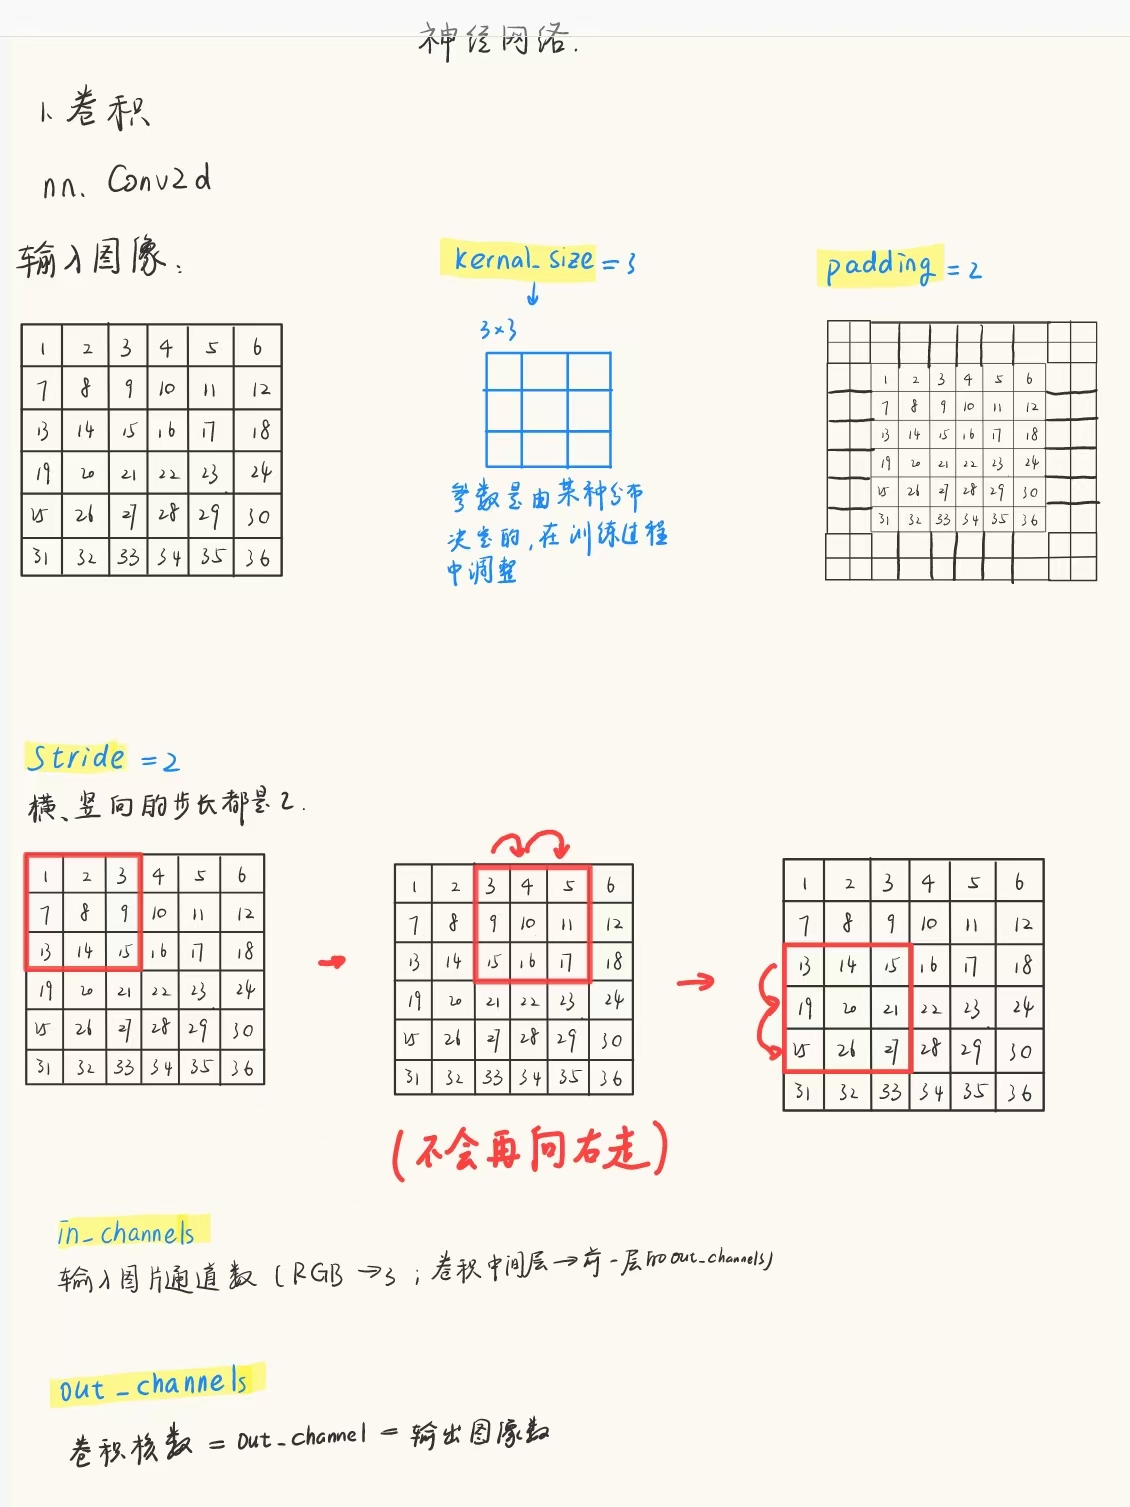

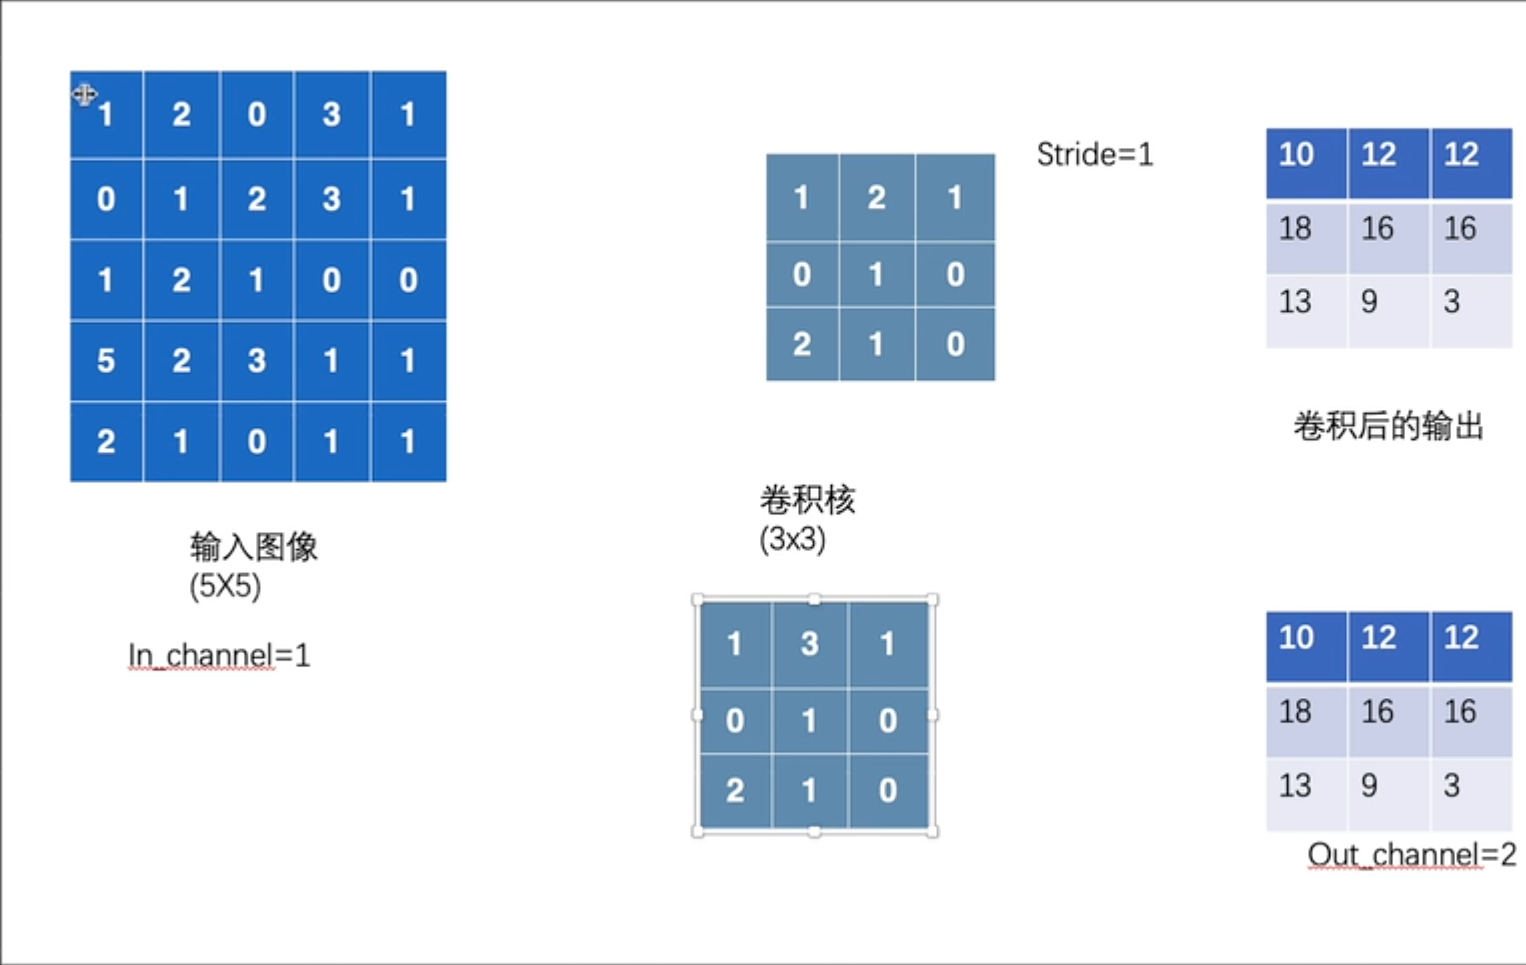

dilation=2 (空洞卷积)

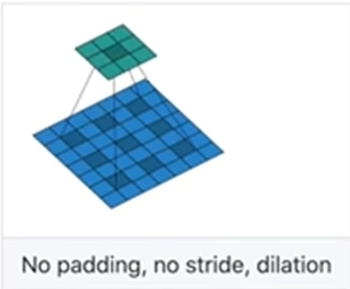

In [8]:
import torchvision
import torch
from torch import nn
from torch.nn import Conv2d
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter


In [2]:
#加载数据集
dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=torchvision.transforms.ToTensor())
dataloader = DataLoader(dataset, batch_size = 64)                                       

In [6]:
#定义卷积神经网络
class Tudui(nn.Module):
    def __init__(self):
        super(Tudui, self).__init__()
        self.conv1 = Conv2d(in_channels = 3, out_channels = 6, kernel_size = 3)

    def forward(self, x):
        x = self.conv1(x)
        return x

In [11]:
#创建实例
tudui = Tudui()

#利用tensorboard记录训练过程中数据
writer = SummaryWriter("logs/Conv2d")

step = 0
for data in dataloader:
    imgs, targets = data
    output = tudui(imgs)
    writer.add_images("input", imgs, step)

    output = torch.reshape(output, (-1, 3, 30, 30))
    writer.add_images("output", output,step)
    step += 1